# Recommendation System

Montar un sistema de recomendación que recomiende a los usuarios nuevos temas que les pueda gustar en base a los resultados obtenidos de sus calificaciones.

La estrategia de sistemas de recomendación que se va a usar es la de Colaborative Filtering

## Cursos de Udemy
Este dataset contiene información detallada sobre todos los cursos disponibles en Udemy el 10 de Octubre de 2022. Estos datos fueron añadidos en el archivo "Course_info.csv". Además, alrededor de 9 millones de comentarios fueron recogidos y añadidos en el archivo "Comments.csv"

La información de al menos 209k cursos fue recogida mediante web scraping de la página web de Udemy. Udemy tiene 209.734 cursos y 73.514 instructores enseñando cursos en 79 idiomas y 13 categorias diferentes.

### Course_info.csv
Archivo .csv que contiene información de todos los cursos disponibles en Udemy.

Las columnas que contiene el archivo Course_info.csv son las siguientes:

- id: Número identificatorio del curso.
- title: Título del curso.
- is_paid: Muestra si el curso se encuentra pagado o no.
- price: Precio del curso.
- headline: Encabezado del curso.
- num_subscribers: Número de subscriptores del curso.
- avg_rating: Calificación media del curso.
- num_reviews: Número de revisiones del curso.
- num_comments: Número de comentarios del curso.
- num_lectures: Número de clases del curso.
- content_length_min: Longitud del contenido del curso (en minutos).
- published_time: Fecha de publicación del curso.
- last_update_date: Última actualización del curso.
- category: Categoría del curso.
- subcategory: Subcategoría del curso
- topic: Tema del curso.
- language: Idioma del curso.
- course_url: Enlace url del curso.
- instructor_name: Nombre del instructor/profesor.
- instructor_url: Enlace url del perfil del instructor/profesor.

### Comments.csv
Archivo .csv que contiene información acerca de los comentarios de los cursos de Udemy

Las columnas que contiene el archivo Comments.csv son las siguientes:
- id: Número identificatorio del comentario publicado.
- course_id: Número identificatorio del curso.
- rate:Calificación puesta del curso.
- date: Fecha en la que se publicó el comentario.
- display_name: Nombre del usuario que ha publicado el comentario.
- comment: Texto publicado por el usuario en el comentario.

In [59]:
# Se importan las librerías necesarias.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

## 1. Carga de los datos


In [60]:
course_info = pd.read_csv('Course_info.csv')
course_info.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [61]:
comments = pd.read_csv('Comments.csv')
comments.head()

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


### 1.1. Obtener información de los dataset

In [62]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209703 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

## 2. Limpieza de los datos

In [63]:
course_info.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,2.097340e+05,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,3.015403e+06,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,1.342558e+06,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,1.769000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.950734e+06,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,3.292863e+06,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,4.189458e+06,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,4.914146e+06,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


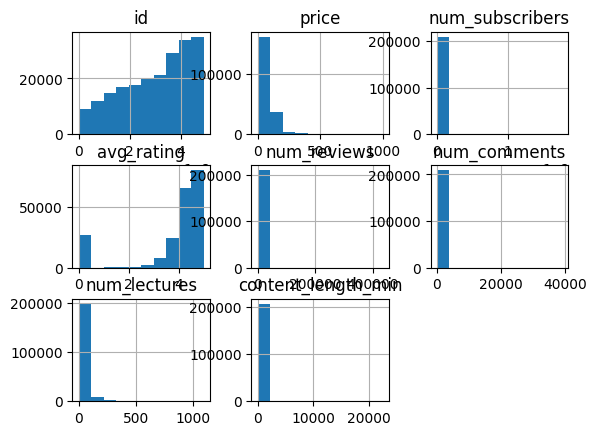

In [64]:
course_info.hist()
plt.show()

In [65]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411727 entries, 0 to 9411726
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   course_id     int64  
 2   rate          float64
 3   date          object 
 4   display_name  object 
 5   comment       object 
dtypes: float64(1), int64(2), object(3)
memory usage: 430.8+ MB


In [66]:
comments.describe()

,id,course_id,rate
count,9.411727e+06,9.411727e+06,9.411727e+06
mean,5.625454e+07,1.589933e+06,4.508870e+00
std,3.754655e+07,1.100059e+06,8.587239e-01
min,5.400000e+01,1.769000e+03,5.000000e-01
25%,2.256843e+07,7.641640e+05,4.000000e+00
50%,5.296542e+07,1.333640e+06,5.000000e+00
75%,8.625520e+07,2.243978e+06,5.000000e+00
max,1.267091e+08,4.913148e+06,5.000000e+00


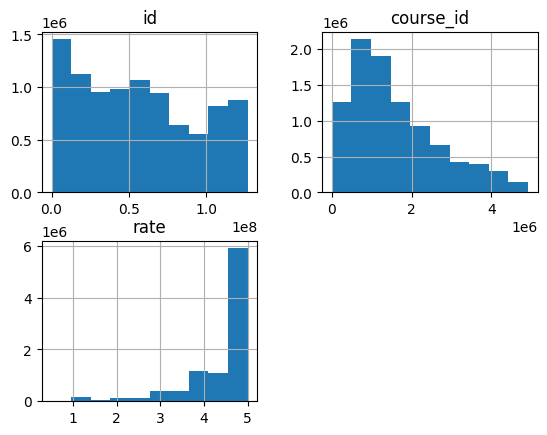

In [67]:
comments.hist()
plt.show()

## 3. Análisis Exploratorio de los Datos (EDA)
### 3.1. Análisis y visualización de datos categóricos

In [68]:
course_info['is_paid'].value_counts()

is_paid
True     187996
False     21738
Name: count, dtype: int64

<Axes: ylabel='count'>

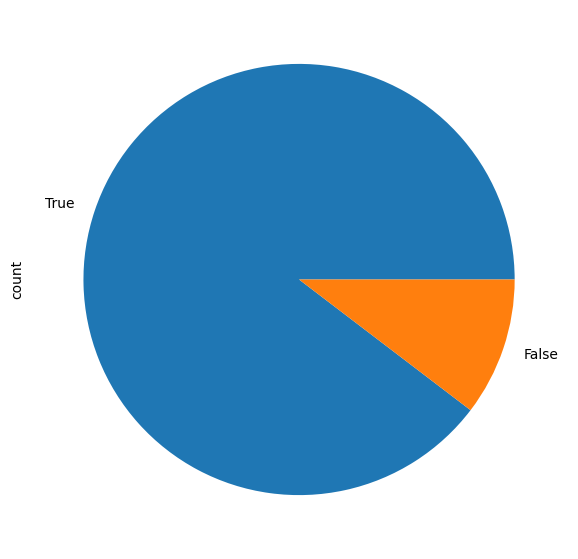

In [69]:
course_info['is_paid'].value_counts().plot(kind='pie', figsize=(7,7))

La mayoría de los cursos de Udemy se encuentran pagados.

In [70]:
course_info['category'].value_counts()

category
Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
Name: count, dtype: int64

<Axes: ylabel='count'>

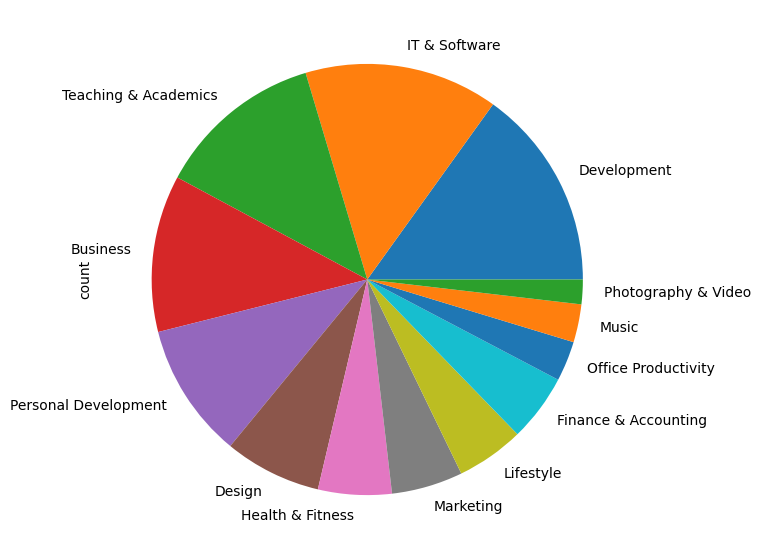

In [71]:
course_info['category'].value_counts().plot(kind='pie', figsize=(7,7))

La categoría de desarrollo (Development) es la que cuenta con el mayor número de cursos de Udemy, seguido muy de cerca por la categoría de IT & Software

In [72]:

course_info['subcategory'].value_counts()

subcategory
Other IT & Software       11523
Web Development           10393
IT Certifications         10337
Language Learning          7551
Programming Languages      7027
                          ...  
Commercial Photography      170
Compliance                  139
Apple                       131
Oracle                      129
Public Relations            114
Name: count, Length: 130, dtype: int64

In [73]:
# subcategory_values = course_info.groupby('subcategory')['id'].count().sort_values()
# other = subcategory_values[subcategory_values < 4000]
# big_subcategory_values = subcategory_values[subcategory_values > 4000]

# Adding a new item "Other" with the sum of the small categories

# small_sums = pd.Series([other.sum()], index=["Other"])
# big_subcategory_values = big_subcategory_values.append(small_sums)

# big_subcategory_values.plot(kind="barh", figsize=(7,7))


,0,1
0,subcategory Microsoft 4314 E...,Other 139396 dtype: int64


Udemy cuenta con 130 subcategorías diferentes, de las cuales, la subcategoría Other IT & Software es la que aparece en el mayor número de cursos seguido de la subcategoría Web Development. Que la columna "Otros" contenga tantos valores significa que no ha sido buena idea agrupar todas las subcategorías sobrantes en una sola columna.

In [74]:
course_info['topic'].value_counts()

topic
Python                    2553
Excel                     2072
English Language          1495
WordPress                 1442
Math                      1341
                          ... 
Business Studio              1
Highcharts                   1
SciPy                        1
Nunit                        1
Security Communication       1
Name: count, Length: 3818, dtype: int64

El tema que más aparece entre los cursos de Udemy es el del lenguaje de programación Python seguido del tema de Excel.

In [75]:
course_info['language'].value_counts()

language
English       123921
Portuguese     18471
Spanish        17428
Turkish         8100
Japanese        7006
               ...  
Welsh              1
Frisian            1
Zulu               1
Tatar              1
Faroese            1
Name: count, Length: 79, dtype: int64

In [76]:
# language_values = course_info.groupby('language')['id'].count().sort_values()
# small_lang_values = language_values[language_values < 7000]
# big_lang_values = language_values[language_values > 7000]

# small_values = pd.Series([small_lang_values.sum()], index = ['Other'])
# big_lang_values = big_lang_values.append(small_values)
# big_lang_values.plot(kind='pie', figsize=(7,7))

AttributeError: 'Series' object has no attribute 'append'

La mayoría de los cursos de Udemy están en inglés, seguido por el ingles y el español. En el gráfico de tarta que el trozo "Otros" sea tan grande nos indica que Udemy tiene varios cursos que se dan en múltiples idiomas. Hay que recordar que en la información de kaggle sobre el conjunto de datos ponía que daban cursos en 79 idiomas diferentes.

In [ ]:
course_info['instructor_name'].value_counts()

instructor_name
Packt Publishing               1254
Bluelime Learning Solutions     422
Illumeo Learning                410
Laurence Svekis                 327
Infinite Skills                 323
                               ... 
Emmanuel Goshen                   1
Erick Segura                      1
Arunkumar Menon                   1
Professor Arthur Mesquita         1
James Dunne                       1
Name: count, Length: 72731, dtype: int64

In [ ]:
# instructor_values = course_info.groupby('instructor_name')['id'].count().sort_values()
# small_instr_values = instructor_values[instructor_values < 300]
# big_instr_values = instructor_values[instructor_values > 300]

# small_values_instr = pd.Series([small_instr_values.sum()], index = ['Other'])
# big_instr_values = big_instr_values.append(small_values_instr)
# big_instr_values.plot(kind='barh')

AttributeError: 'Series' object has no attribute 'append'

Tal como se puede apreciar en el gráfico, Udemy cuenta con muchos profesores especializados en diferentes categorías o temas.

In [ ]:
comments['rate'].value_counts()

rate
5.0    5899806
4.0    1165812
4.5    1106120
3.5     390865
3.0     379772
1.0     174177
2.5     130326
2.0     110983
1.5      40134
0.5      13713
4.9          3
4.4          3
3.7          2
4.6          2
1.2          2
4.1          2
4.8          2
4.2          2
3.9          1
Name: count, dtype: int64

In [ ]:
comments.display_name.value_counts()

display_name
Anonymized               147793
David                     50781
Michael                   44334
Daniel                    39054
John                      36334
                          ...  
Souregi                       1
Reisson Luis Saavedra         1
khuram                        1
هلال                          1
Rao Saurabh                   1
Name: count, Length: 1420901, dtype: int64

In [ ]:
user_values = comments.groupby('display_name')['id'].count().sort_values()

In [ ]:
small_user_values = user_values[user_values < 500]
small_user_values

display_name
山田雄亮                          1
Miguel Fernando Cifuentes      1
Miguel Fernando Juárez         1
Miguel Fernando Macias         1
Miguel Fernando Pabon          1
                            ... 
Magda                        499
Om                           499
Anant                        499
Mithun                       499
Bethany                      499
Name: id, Length: 1418883, dtype: int64

In [ ]:
small_user_values.sum()

5057186

In [ ]:
big_user_values = user_values[user_values > 500]
big_user_values.sum()

4277154

In [ ]:
small2_user_values = user_values[user_values < 50]
small2_user_values 

display_name
山田雄亮                         1
Miguel Fernando Cifuentes     1
Miguel Fernando Juárez        1
Miguel Fernando Macias        1
Miguel Fernando Pabon         1
                             ..
Dhiraj Kumar                 49
Nelli                        49
Wessam                       49
Murathan                     49
Bikramjit                    49
Name: id, Length: 1406739, dtype: int64

In [ ]:
small2_user_values.sum()

3400131

In [ ]:
unique_user_values = user_values[user_values == 1]

In [ ]:
unique_user_values.sum()

903569

Se puede observar que la mayoría de comentarios publicados en Udemy son anónimos, por lo que no podríamos saber de que usuario es el comentario publicado. Además, se puede observar que el resto usuarios con mayor número de publicaciones son nombres comunes, esto en un principio nos podría indicar que el nombre del usuario no es único, por lo que varios usuarios podrían tener el mismo nombre.

### 3.2. Análisis y visualización de datos numéricos

Text(0, 0.5, 'Frecuencias')

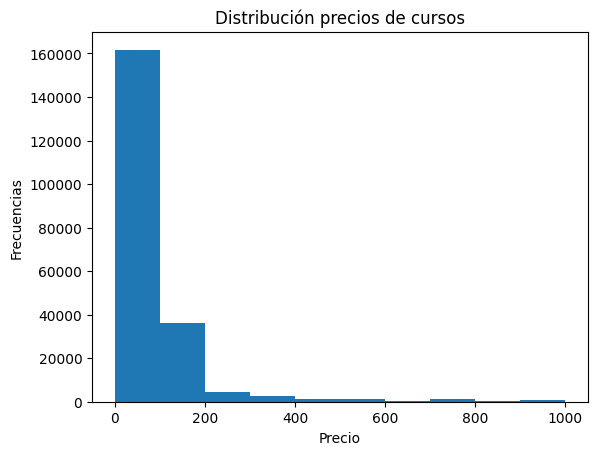

In [ ]:
#course_info['price'].plot(kind='hist', figsize=(7,7))
plt.hist(course_info['price'])
plt.title('Distribución precios de cursos')
plt.xlabel('Precio')
plt.ylabel('Frecuencias')

A través del histograma se puede observar que los datos van en el rango de 0 € - 1000 €. El histograma se encuentra dividido en 10 barras cuyo ancho es de 100 €. El histograma no sigue una distribución normal debido a que la distribución se encuentra desplazada hacia la izquierda en vez de encontrarse en el centro (distribución normal), siendo así una distribución asimétrica positiva.

Text(0, 0.5, 'Frecuencias')

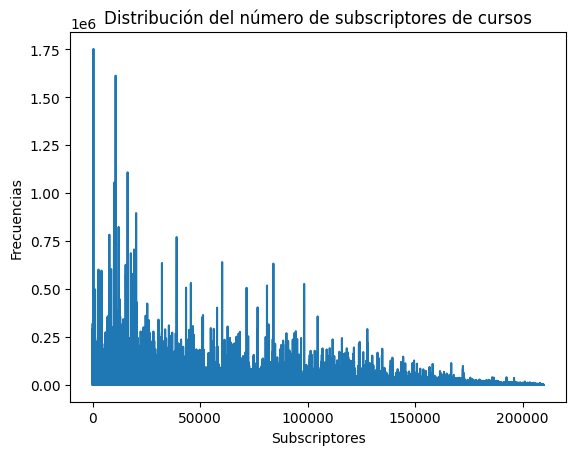

In [ ]:
plt.plot(course_info['num_subscribers'])
plt.title('Distribución del número de subscriptores de cursos')
plt.xlabel('Subscriptores')
plt.ylabel('Frecuencias')

Text(0.5, 1.0, 'Diagrama de cajas y bigotes de la calificación media de cursos')

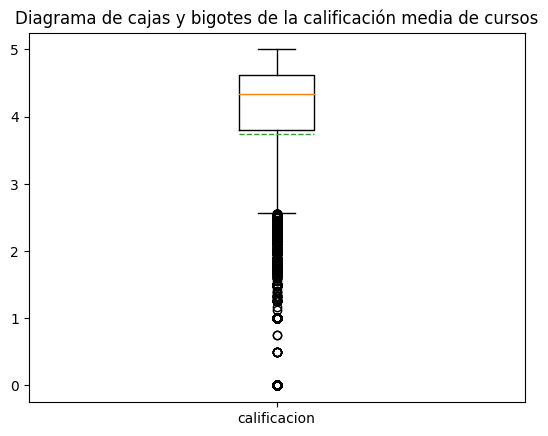

In [ ]:
plt.boxplot(course_info['avg_rating'],showmeans=True,meanline=True,labels=['calificacion'])
plt.title('Diagrama de cajas y bigotes de la calificación media de cursos')

La calificación media de los cursos tiene al 75 % de sus datos entre el 4 y 5. Además podemos encontrar outliers que van desde los 3 puntos hasta cero.

Text(0, 0.5, 'Frecuencias')

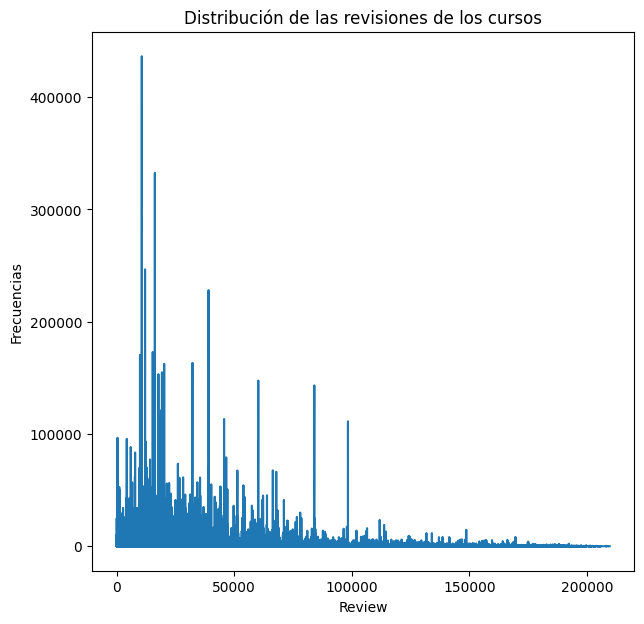

In [ ]:
course_info['num_reviews'].plot(figsize=(7,7))
#plt.hist(course_info['price'])
plt.title('Distribución de las revisiones de los cursos')
plt.xlabel('Review')
plt.ylabel('Frecuencias')

Text(0, 0.5, 'Frecuencias')

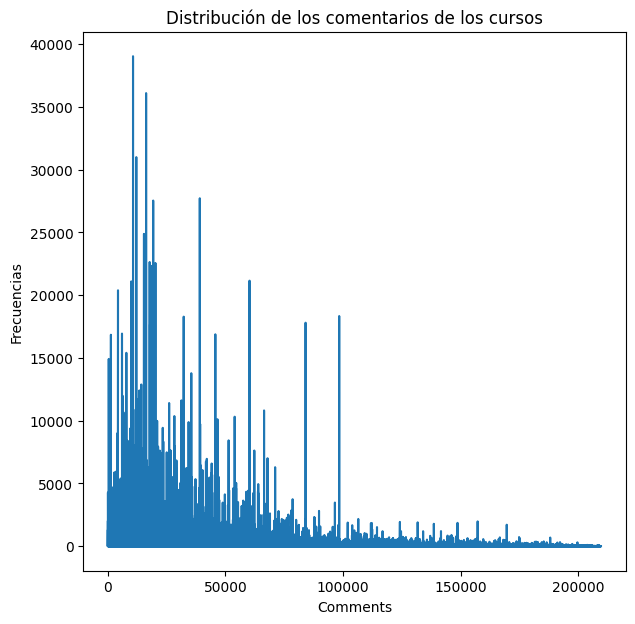

In [ ]:
course_info['num_comments'].plot(figsize=(7,7))
#plt.hist(course_info['num_comments'])
plt.title('Distribución de los comentarios de los cursos')
plt.xlabel('Comments')
plt.ylabel('Frecuencias')

Text(0, 0.5, 'Frecuencias')

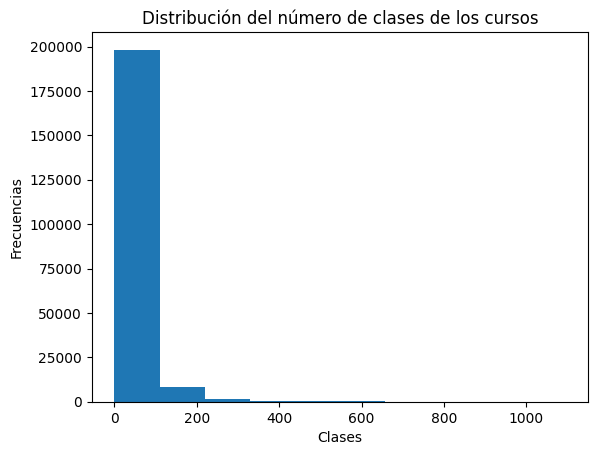

In [ ]:
#course_info['num_lectures'].plot(figsize=(7,7))
plt.hist(course_info['num_lectures'])
plt.title('Distribución del número de clases de los cursos')
plt.xlabel('Clases')
plt.ylabel('Frecuencias')

Text(0, 0.5, 'Frecuencia')

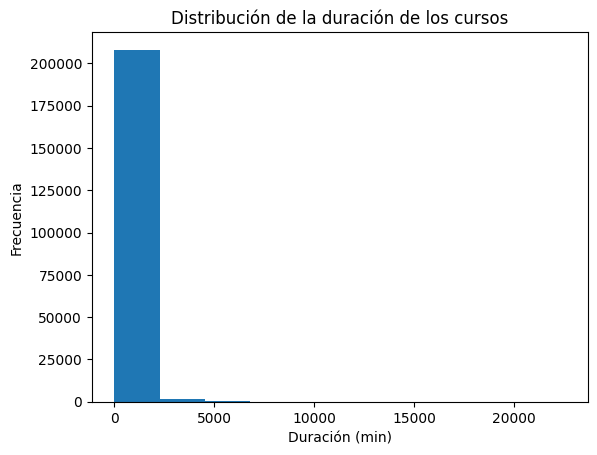

In [ ]:
#course_info['content_length_min'].plot(figsize=(7,7))
plt.hist(course_info['content_length_min'])
plt.title('Distribución de la duración de los cursos')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Diagrama de cajas y bigotes de la calificación de los comentarios del curso')

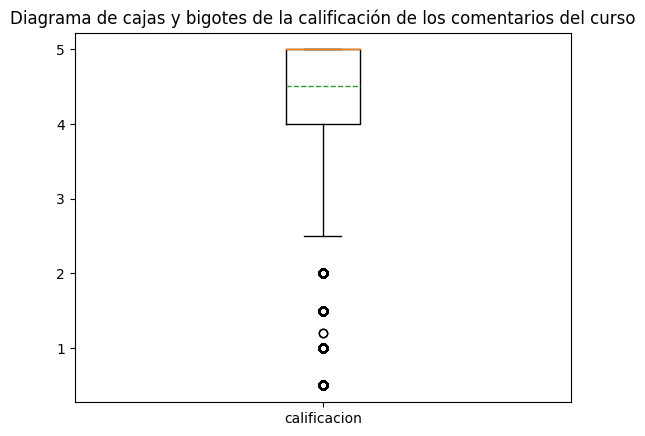

In [ ]:
plt.boxplot(comments['rate'],showmeans=True,meanline=True,labels=['calificacion'])
plt.title('Diagrama de cajas y bigotes de la calificación de los comentarios del curso')

In [ ]:
comments['id'].value_counts()

id
88962892    1
1740012     1
1697764     1
1712096     1
1715212     1
           ..
31621822    1
31599314    1
31274192    1
31218192    1
54456596    1
Name: count, Length: 9411727, dtype: int64

## 4. Sistema de recomendación basado en contenido.
Los sistemas basados en el contenido tratan de averiguar los aspectos favoritos de un usuario de un artículo, y luego hacen recomendaciones sobre artículos que comparten estos aspectos
### 4.1. Preparación de los datos
De cara a la recomendación hay dos enfoques principales:
1. Realizar un sistema en base a la descripción de los cursos.
2. Realizar el sistema de recomendación en base a las características del curso
Para este caso se realizará el sistema de recomendación en base a las características

In [ ]:
course_info.shape

(209734, 20)

In [ ]:
comments.shape

(9411727, 6)

In [ ]:
# se eliminan las columnas que no interesan
# comments_filtered= comments.drop(labels=['date', 'display_name', 'comment'], axis=1)
column_keep = ['category', 'subcategory','instructor_name', 'is_paid', 'price']
column_delete = []
for column in course_info.columns:
    if column not in column_keep:
        column_delete.append(column)
courses_filtered = course_info.drop(labels=column_delete, axis=1)

In [ ]:
# comprueba la cantidad de valores nulos
print(courses_filtered.isnull().sum())
# crea una lista vacia para las columna con valores nulos
column_dropna=[]
# itera a traves de un dict nom_colum:cant_nulos y guarda el nombre de la columa si tiene nulos
for key, value in courses_filtered.isnull().sum().to_dict().items():
    if value !=0: 
        column_dropna.append(key)
# elina las filas que contienen nulos 
courses_filtered.dropna(axis= 0, how='any', subset=column_dropna, inplace= True)

is_paid            0
price              0
category           0
subcategory        0
instructor_name    5
dtype: int64


### 4.2. Creación del sistema de recomendación

El sistema se basa en dos pasos:
- Encontrar la similitud de una película que le ha gustado al usuario respecto al resto de películas.
- Seleccionar las N películas que más se parezcan a la película que le ha gustado al usuario.

El proceso se parece mucho al algoritmo kNN. Sin embargo, hay que tener en cuenta que se tiene una matriz sparse, por lo que no podemos aplicar cualquier tipo de distancia, sino que tendremos que aplicar una distancia como la distancia del coseno.

De esta forma para montar el sistema de recomendación basado en contenido se va a calcular la matriz de similitudes entre los diferentes cursos. Es por esto que se usará la función NearestNeighbors fijando como el tipo de distancia cosine:

Con esto ya se tendría al recomendador de cursos entrenado. A continuación para comprobar que el recomendador funciona correctamente se le pasará un nuevo curso.

In [ ]:
# pipeline para variables numericas
numeric_pipe = Pipeline([
    ('scaler', StandardScaler())
    ])

# pipeline para variables categoricas
categorical_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop = 'first'))
    ])

# contiene las transformaciones
col_transf = ColumnTransformer(transformers=[
    #('numeric', numeric_pipe, courses_filtered._get_numeric_data().columns.tolist()),
    ('categoric', categorical_pipe, courses_filtered.select_dtypes('object').columns.tolist())
    ])

col_transf_fit = col_transf.fit(courses_filtered)
courses_filtered_transf = col_transf_fit.transform(courses_filtered)
# 10 recomendaciones
nneighbors = NearestNeighbors(n_neighbors = 10, metric = 'cosine').fit(courses_filtered_transf)
# recomendaciones para las 100 primeras posiciones
ind = nneighbors.kneighbors(courses_filtered_transf[:100], return_distance=False)

In [ ]:
#ejemplo de recomendacion
print("Curso visto")
print("-"*80)
print(course_info.loc[ind[0][1], :])
print()
print("Cursos recomendados")
print("-"*80)
courses_reco = courses_filtered.loc[ind[0][1:], :].join(course_info, how='inner', lsuffix='_filtered')
column_keep = ['id', 'title', 'category', 'subcategory', 
               'instructor_name', 'is_paid', 'price', 'topic', 
               'language', 'course_url']
column_delete = []
for column in courses_reco:
    if column not in column_keep:
        column_delete.append(column)
courses_reco.drop(column_delete, axis=1, inplace=True)
courses_reco.head()

Curso visto
--------------------------------------------------------------------------------
id                                                              26438.0
title                             Happy Vegetarian Kids Cooking Healthy
is_paid                                                            True
price                                                             49.99
headline              Children learn how to be healthy and cook some...
num_subscribers                                                   196.0
avg_rating                                                         3.95
num_reviews                                                        19.0
num_comments                                                        6.0
num_lectures                                                       21.0
content_length_min                                                216.0
published_time                                     2012-10-11T13:22:39Z
last_update_date                           

,id,title,is_paid,price,category,subcategory,topic,language,course_url,instructor_name
431,26438.0,Happy Vegetarian Kids Cooking Healthy,True,49.99,Lifestyle,Food & Beverage,Cooking,English,/course/happy-kids-cooking-healthy-part-1/,Angela Poch
129102,3748394.0,Pelajari D5 Render dalam Bahasa Indonesia,False,0.00,Design,Architectural Design,Photorealistic Rendering,Indonesian,/course/learn-d5-render-in-bahasa-indonesia/,D5 Render Team
158163,4202238.0,350-401 ~ CCNP Enterprise ENCOR Core Practice ...,True,19.99,IT & Software,IT Certifications,CCNP Enterprise,English,/course/cisco-enterprise-network-and-core-tech...,Rifat Academy
131379,3786138.0,Curso de GNU Octave - Nível Intermediário,True,79.90,IT & Software,Other IT & Software,GNU,Portuguese,/course/curso-de-octave-intermediario/,"Conecta, que eu te ensino!"
38130,1539176.0,React Fiber v16 Essentials,True,49.99,Development,Web Development,React JS,English,/course/react-fiber-v16-essentials/,Guy Ziv
